# MMA 823 : Analytics For Financial Markets

## Individual Assignment

### submitted by - Nishchay Vermani 

### 20289622

#### Question 1
The accompanying data is real stock data with a made up ticker and dates. We have removed
the last day’s closing price, but have included other real stock data up to that day so you have
exogenous factors to include. All prices are closing prices. Assume you can buy at close.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load libraries
import numpy as np
import pandas as pd
import math
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD   
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest

In [3]:
df= pd.read_excel('Downloads/MMA823_AssignmentData_topost.xlsx')

In [4]:
df.tail()

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
1136,1137,112.766838,179.836319,169.669495,2958.129883,265.285767,57.430000,1093.939941,58.278038,112.848961,...,17.453543,155.113174,255.381592,554.017944,4791.19,36302.38,17.68,114.85,1.3438,1.1329
1137,1138,112.995125,178.799164,170.660995,2933.739990,264.929749,57.110001,1088.469971,57.106567,114.182762,...,17.453543,154.843491,255.570953,554.574707,4786.35,36398.21,17.54,114.75,1.3432,1.1314
1138,1139,114.146523,178.888916,169.201004,2933.100098,265.533020,57.230000,1086.189941,56.683266,114.983032,...,17.453543,155.193085,256.617401,559.178162,4793.06,36488.63,16.95,114.97,1.3475,1.1337
1139,1140,112.935577,177.712143,168.644501,2924.010010,264.267120,58.130001,1070.339966,57.490494,114.844719,...,17.523436,154.803528,257.683777,554.216675,4778.73,36398.08,17.33,115.17,1.3500,1.1318
1140,1141,NaN,177.083878,166.716995,2897.040039,265.117676,58.630001,1056.780029,58.130367,115.565948,...,17.363678,155.812393,257.763519,561.097168,4766.18,36338.30,17.22,0.00,0.0000,0.0000


In [5]:
df.shape

(1141, 25)

<AxesSubplot:>

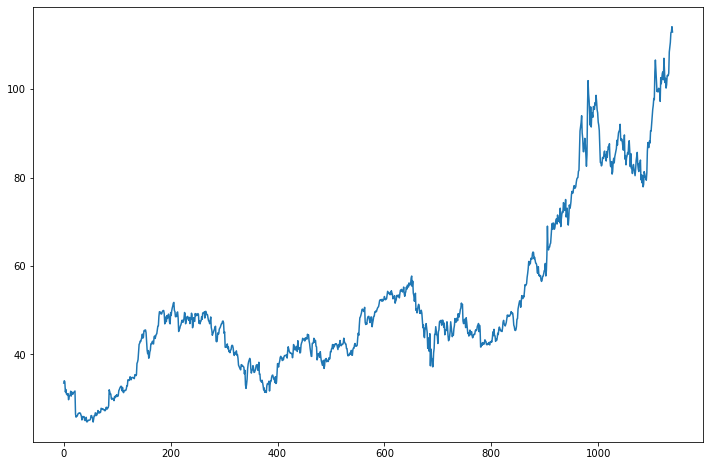

In [6]:
df.MMAX.plot()

### Calculating Returns for MMAX

In [7]:
returns=(df-df.shift(1))/df.shift(1)

In [8]:
returns.dropna(inplace=True)

In [9]:
returns.head(5)

,Date,MMAX,AAPL,AMZN,GOOGL,MCD,GM,TSLA,PFE,SBUX,...,HST,HLT,FDX,DPZ,SP500,DJIA,VIXCLS,DEXJPUS,DEXUSUK,DEXUSEU
1,1.000000,0.015710,0.004463,0.002437,0.009697,-0.001034,0.000293,0.002195,0.003230,0.005041,...,0.002678,0.003068,0.017578,-0.004769,0.001561,-0.000118,-0.043893,-0.000898,0.005372,0.004306
2,0.500000,-0.006562,-0.003144,-0.009724,-0.014197,-0.004397,0.009357,-0.015543,-0.003804,-0.002842,...,0.012286,-0.002599,0.000046,0.008431,0.000316,0.000691,-0.011976,0.001977,0.000393,0.000000
3,0.333333,-0.067940,-0.014333,-0.017304,-0.024689,-0.001559,-0.008980,-0.040054,-0.007932,-0.011402,...,-0.007388,-0.027288,-0.004783,-0.026224,-0.008073,-0.004619,0.117172,0.008432,0.004634,0.009289
4,0.250000,0.016958,0.014611,0.013872,0.013627,0.003773,0.010816,0.024478,-0.000592,0.003732,...,-0.000537,-0.001418,0.013157,0.002158,0.008808,0.006755,-0.093128,-0.002135,0.011336,0.005664
5,0.200000,-0.031608,-0.014744,-0.014541,-0.024131,-0.007583,0.008097,-0.028257,-0.003556,-0.013856,...,-0.006452,-0.017519,-0.008842,-0.013343,-0.008600,-0.007811,0.140578,0.001248,0.003711,0.004928


## a) Plot the daily returns of MMAX over the entire period using your choice of graph

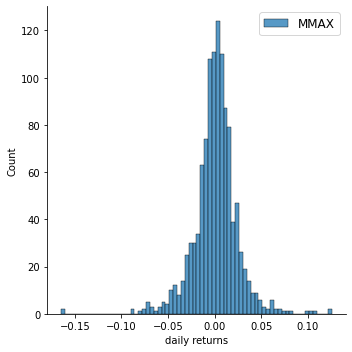

In [10]:
sns.displot(returns['MMAX'], kind='hist', label='MMAX')
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('daily returns')
plt.show()

## b) Train at least 3 models to predict the missing stock price of MMX

## DATA CLEANING AND PREPROCESSING

### ~ Dropped Date as it adds no predictive power.

In [11]:
df.drop(['Date'],axis=1 , inplace =True)

### ~ Created New Features to reflect one month, three month, six month and yearly resturns for MMAX.

In [12]:
X4 = pd.concat([np.log(df.loc[:, 'MMAX']).diff(i) for i in [21, 63, 126,252]], axis=1).dropna()
X4.columns = ['1M', '3M', '6M', '1Y']

In [13]:
df = pd.concat([df, X4], axis=1)

###  ~ Converting the data to supervised regression format

All the predictor variables are changed to lagged variable, as the t-1 value of the lagged variable will be used for prediction. 

In [14]:
def series_to_supervised(data, lag=1):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)    
    cols, names = list(), list()
    for i in range(lag, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (df.columns[j], i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    agg = pd.DataFrame(data.iloc[:,0]).join(agg)
    agg.dropna(inplace=True)
    return agg

In [15]:
dataset= series_to_supervised(df,1)
dataset.tail(5)

,MMAX,MMAX(t-1),AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),...,SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
1135,110.593086,109.491325,175.159149,171.037003,2928.300049,262.022125,56.080002,1008.869995,58.622581,110.398727,...,4696.56,35753.89,18.63,114.22,1.3345,1.1324,0.088735,0.266854,0.259213,0.580079
1136,112.766838,110.593086,175.797394,171.068497,2938.330078,263.021027,56.910000,1067.000000,57.795666,111.021172,...,4725.79,35950.56,17.96,114.42,1.3410,1.1320,0.099141,0.264710,0.267953,0.600822
1137,112.995125,112.766838,179.836319,169.669495,2958.129883,265.285767,57.430000,1093.939941,58.278038,112.848961,...,4791.19,36302.38,17.68,114.85,1.3438,1.1329,0.123936,0.274579,0.290776,0.621556
1138,114.146523,112.995125,178.799164,170.660995,2933.739990,264.929749,57.110001,1088.469971,57.106567,114.182762,...,4786.35,36398.21,17.54,114.75,1.3432,1.1314,0.150201,0.308280,0.275891,0.630433
1139,112.935577,114.146523,178.888916,169.201004,2933.100098,265.533020,57.230000,1086.189941,56.683266,114.983032,...,4793.06,36488.63,16.95,114.97,1.3475,1.1337,0.106645,0.331568,0.283182,0.669126




### ~ Dropped 'MMAX(t-1)'

In [16]:
dataset.drop(columns=['MMAX(t-1)'], axis =1, inplace=True)

In [17]:
dataset.head(4)

,MMAX,AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),TWTR(t-1),...,SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1),DEXUSUK(t-1),DEXUSEU(t-1),1M(t-1),3M(t-1),6M(t-1),1Y(t-1)
253,47.011024,44.444683,85.783501,1169.290039,149.701096,38.284576,66.725998,29.911913,47.310783,45.880001,...,2754.88,24580.89,13.77,109.98,1.3258,1.1630,0.009709,0.044629,0.359038,0.381282
254,47.583607,43.783737,83.157501,1139.280029,145.388855,37.690590,66.601997,29.805403,46.775269,44.169998,...,2717.07,24252.80,17.33,109.62,1.3273,1.1694,-0.032209,-0.029632,0.306819,0.323776
255,46.893143,44.326908,84.554497,1132.619995,146.389572,38.061829,68.400002,29.805403,46.516743,44.840000,...,2723.06,24283.11,15.92,109.92,1.3243,1.1675,-0.006107,-0.004365,0.313933,0.342466
256,47.457306,44.262016,83.025497,1116.939941,143.214508,37.467834,68.900002,29.666132,46.018150,43.700001,...,2699.63,24117.59,17.91,110.34,1.3139,1.1588,-0.016888,-0.010580,0.300028,0.398208


### ~ Exploring the dataset

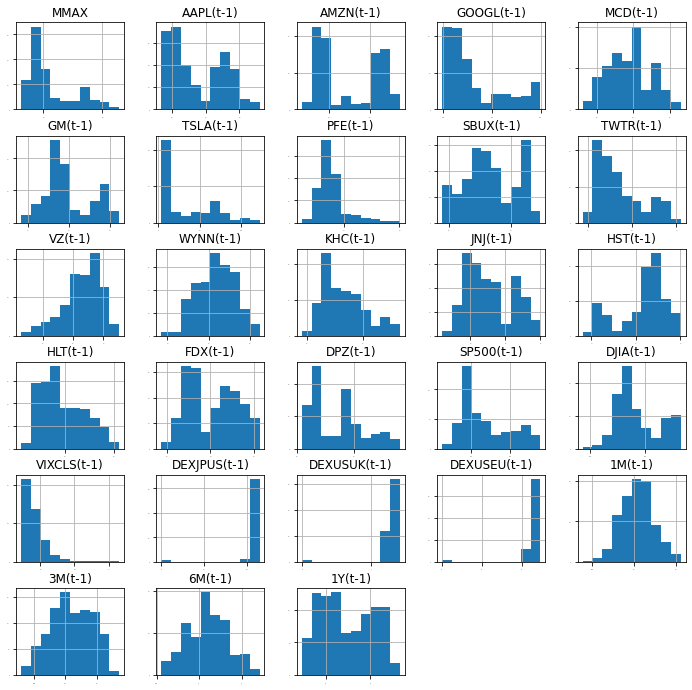

In [18]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

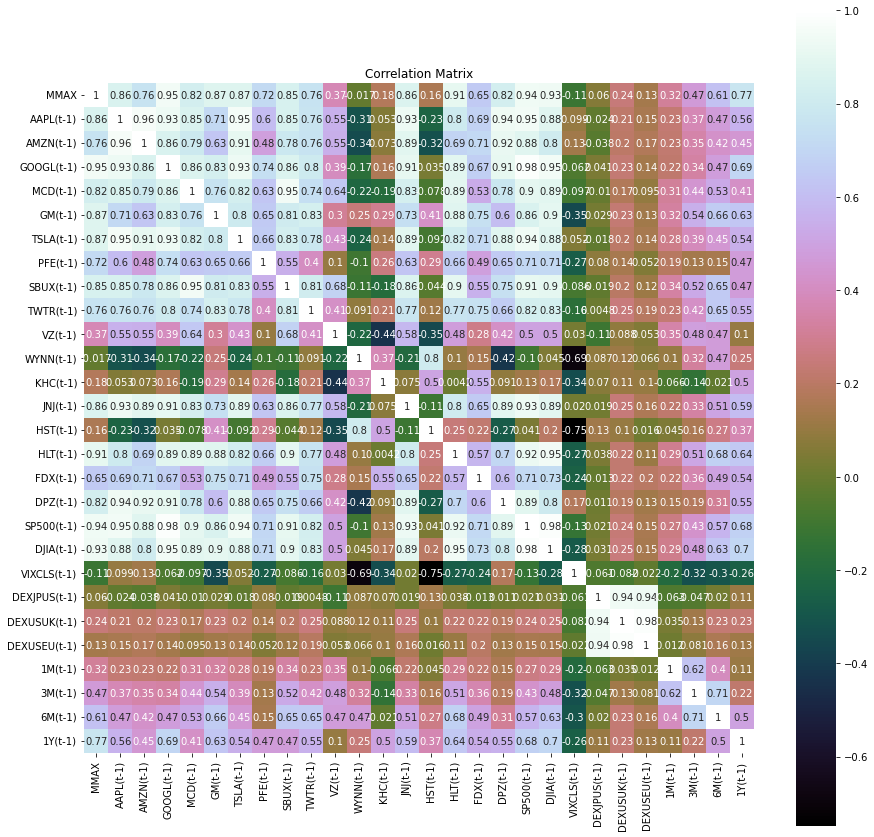

In [19]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### ~ Checking for null values

In [20]:
print('Null Values =',dataset.isnull().values.any()) #checking for null values

Null Values = False


### ~ Performed log Transformation

In [21]:
Y= dataset["MMAX"]
X = dataset.loc[:, dataset.columns != 'MMAX']

loggedY = np.log(Y)

### ~ Performed MinMax scaling 

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = pd.DataFrame(scaler.fit_transform(X))
# summarize transformed data
rescaledX.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.068975,0.155693,0.091755,0.144490,0.449374,0.025904,0.142715,0.031671,0.429265,0.023712,...,0.202484,0.334640,0.040646,0.953529,0.934452,0.945913,0.541238,0.509681,0.696018,0.591321
1,0.064430,0.133695,0.076840,0.112641,0.436950,0.025800,0.139710,0.024867,0.398526,0.015465,...,0.187689,0.316308,0.090200,0.950407,0.935509,0.951118,0.470037,0.415290,0.650708,0.539329
2,0.068165,0.145398,0.073530,0.120032,0.444715,0.027306,0.139710,0.021583,0.410570,0.000000,...,0.190033,0.318002,0.070573,0.953008,0.933394,0.949573,0.514373,0.447406,0.656881,0.556227
3,0.067719,0.132589,0.065737,0.096582,0.432291,0.027724,0.135780,0.015249,0.390077,0.000517,...,0.180865,0.308753,0.098274,0.956650,0.926064,0.942497,0.496061,0.439506,0.644815,0.606623
4,0.069933,0.149737,0.070628,0.089191,0.435203,0.028634,0.139248,0.000000,0.409671,0.080414,...,0.187392,0.314255,0.083519,0.956997,0.922963,0.942009,0.493388,0.418800,0.655810,0.602232


## Feature Selection

### ~ Identified most important features using SelectKBest

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_regression

bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(rescaledX,loggedY)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
SP500(t-1),7975.380003
GOOGL(t-1),7155.919101
DJIA(t-1),6378.114776
HLT(t-1),4483.569784
TSLA(t-1),2745.648937
AAPL(t-1),2722.068812
JNJ(t-1),2613.919977
SBUX(t-1),2591.174726
GM(t-1),2549.445910


## MODELING

### ~ Split the data into Test and Train Datasets

In [24]:
# split out validation dataset for the end

test_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
seed = 42
# X_train, X_test, Y_train, Y_vtest = train_test_split(X, Y, test_size=test_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.

train_size = int(len(X) * (1-test_size))
X_train, X_test = rescaledX[0:train_size], rescaledX[train_size:len(X)]
Y_train, Y_test = loggedY[0:train_size], loggedY[train_size:len(X)]

In [25]:
# test options for regression
num_folds = 10
scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
#scoring = 'r2'

### ~ Trained different models

Chose different alogorithms to test which performs the best.

-> K- nearest neighbour

-> Decision Tree

-> SVR

-> MLP

-> Gradient Boosting

-> Random Forest

-> Extra Trees

In [26]:
# spot check the algorithms
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
models.append(('MLP', MLPRegressor()))

In [27]:
#Ensable Models 
# Boosting methods
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

### ~ Performed 10-Fold Cross Validation and compared the MSE scores

In [28]:
names = []
kfold_results = []
test_results = []
train_results = []

print("Model,\t CrossValMean,\t CrossValSTD,\t train_MSE,\t test_MSE")
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: \t  %f \t  (%f) \t   %f \t   %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

Model,	 CrossValMean,	 CrossValSTD,	 train_MSE,	 test_MSE
KNN: 	  0.000977 	  (0.000728) 	   0.000520 	   0.035701
CART: 	  0.001521 	  (0.000540) 	   0.000000 	   0.080270
SVR: 	  0.002811 	  (0.000305) 	   0.002683 	   0.131548


D:\MMA\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP: 	  0.010598 	  (0.004110) 	   0.013162 	   0.051207
GBR: 	  0.000822 	  (0.000195) 	   0.000243 	   0.083602
RFR: 	  0.000802 	  (0.000409) 	   0.000106 	   0.064699
ETR: 	  0.000551 	  (0.000165) 	   0.000000 	   0.063660


### ~ ExtraTrees seems to perform the best

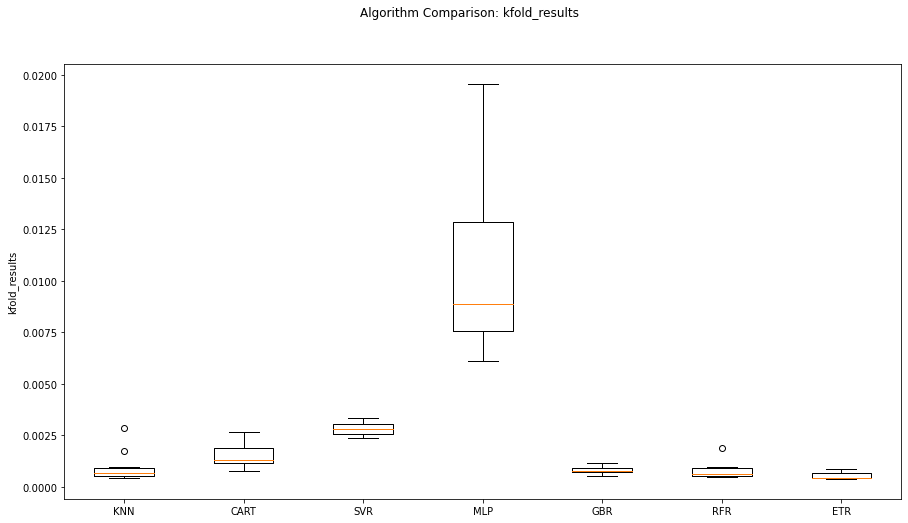

In [29]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison: kfold_results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
plt.ylabel('kfold_results')
fig.set_size_inches(15,8)
plt.show()

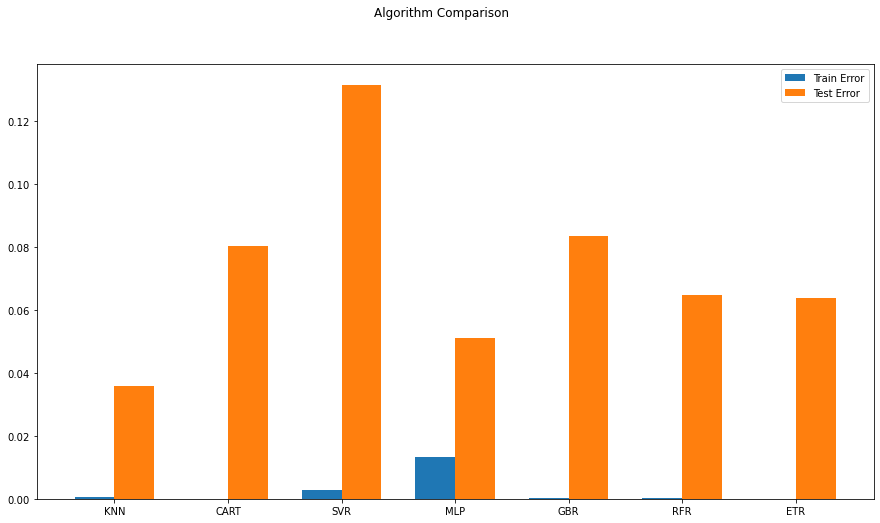

In [30]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

### ~ Preparing Data for LSTM

In [31]:
X_train_LSTM, X_test_LSTM = np.array(X_train), np.array(X_test)
Y_train_LSTM, Y_test_LSTM = np.array(Y_train), np.array(Y_test)
X_train_LSTM= X_train_LSTM.reshape((X_train_LSTM.shape[0], 1, X_train_LSTM.shape[1]))
X_test_LSTM= X_test_LSTM.reshape((X_test_LSTM.shape[0], 1, X_test_LSTM.shape[1]))
print(X_train_LSTM.shape, Y_train_LSTM.shape, X_test_LSTM.shape, Y_test_LSTM.shape)

(709, 1, 27) (709,) (178, 1, 27) (178,)


In [32]:
# design network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM,\
                              Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),\
                              epochs=50, batch_size=72, verbose=0, shuffle=False)


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


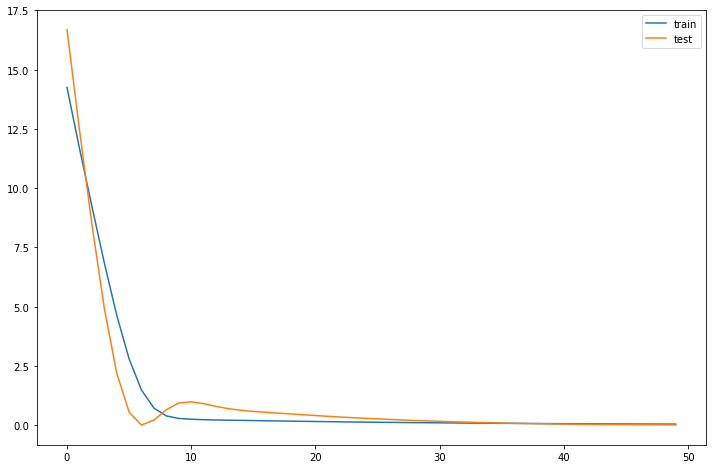

In [33]:
#Visual plot to check if the error is reducing
plt.plot(LSTMModel_fit.history['loss'], label='train')
plt.plot(LSTMModel_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

train_results.append(error_Training_LSTM)
test_results.append(error_Test_LSTM)
names.append("LSTM")

print('For the final model:')
print('MSE:\t ',error_Test_LSTM, '\t RMSE:\t ', np.sqrt(error_Test_LSTM))

6/6 [==============================] - 0s 2ms/step
For the final model:
MSE:	  0.020067886015442554 	 RMSE:	  0.14166116622223096


### ~ Extra Trees still seems as the best performer

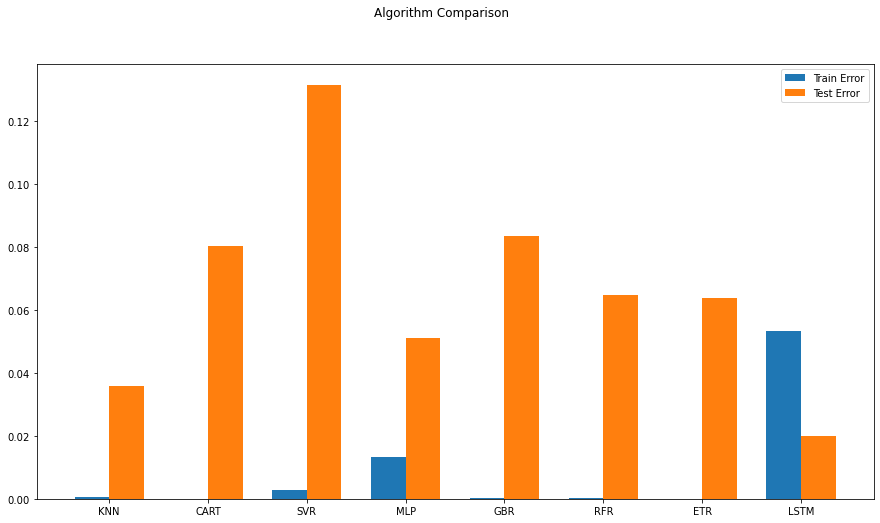

In [35]:
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

### ~ Perfoming Hyper Parameter Tuning  on All algorithms 

#### KNN

In [36]:

# 4. Grid search : KNeighborsRegressor 
'''
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`kneighbors` queries.
'''
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000812 using {'n_neighbors': 11}
-0.001042 (0.000824) with: {'n_neighbors': 1}
-0.000957 (0.001039) with: {'n_neighbors': 3}
-0.000977 (0.000728) with: {'n_neighbors': 5}
-0.000890 (0.000441) with: {'n_neighbors': 7}
-0.000836 (0.000317) with: {'n_neighbors': 9}
-0.000812 (0.000223) with: {'n_neighbors': 11}
-0.000820 (0.000172) with: {'n_neighbors': 13}
-0.000851 (0.000157) with: {'n_neighbors': 15}
-0.000887 (0.000177) with: {'n_neighbors': 17}
-0.000934 (0.000185) with: {'n_neighbors': 19}
-0.000996 (0.000193) with: {'n_neighbors': 21}


#### Decision Tree

In [37]:
param_grid={'min_samples_split': [2,3,4,5,6,7,8,9,10]}
model = DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.001355 using {'min_samples_split': 9}
-0.001552 (0.000473) with: {'min_samples_split': 2}
-0.001436 (0.000462) with: {'min_samples_split': 3}
-0.001519 (0.000594) with: {'min_samples_split': 4}
-0.001401 (0.000513) with: {'min_samples_split': 5}
-0.001522 (0.000647) with: {'min_samples_split': 6}
-0.001592 (0.000758) with: {'min_samples_split': 7}
-0.001370 (0.000490) with: {'min_samples_split': 8}
-0.001355 (0.000510) with: {'min_samples_split': 9}
-0.001497 (0.000562) with: {'min_samples_split': 10}


#### SVR

In [38]:
param_grid={'C': [0.01, 0.03,0.1,0.3,1,3,10,30,100],
            'gamma': [0.001, 0.01, 0.1, 1]},
            #'epslion': [0.01, 0.1, 1]}
model = SVR()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.002220 using {'C': 30, 'gamma': 0.01}
-0.034706 (0.006451) with: {'C': 0.01, 'gamma': 0.001}
-0.027743 (0.005163) with: {'C': 0.01, 'gamma': 0.01}
-0.009354 (0.001464) with: {'C': 0.01, 'gamma': 0.1}
-0.006092 (0.000926) with: {'C': 0.01, 'gamma': 1}
-0.032965 (0.006134) with: {'C': 0.03, 'gamma': 0.001}
-0.017607 (0.003064) with: {'C': 0.03, 'gamma': 0.01}
-0.005466 (0.000643) with: {'C': 0.03, 'gamma': 0.1}
-0.004200 (0.000665) with: {'C': 0.03, 'gamma': 1}
-0.027596 (0.005146) with: {'C': 0.1, 'gamma': 0.001}
-0.008369 (0.001041) with: {'C': 0.1, 'gamma': 0.01}
-0.003854 (0.000387) with: {'C': 0.1, 'gamma': 0.1}
-0.003398 (0.000473) with: {'C': 0.1, 'gamma': 1}
-0.017448 (0.003047) with: {'C': 0.3, 'gamma': 0.001}
-0.005373 (0.000571) with: {'C': 0.3, 'gamma': 0.01}
-0.002941 (0.000274) with: {'C': 0.3, 'gamma': 0.1}
-0.003155 (0.000479) with: {'C': 0.3, 'gamma': 1}
-0.008332 (0.001034) with: {'C': 1, 'gamma': 0.001}
-0.003791 (0.000399) with: {'C': 1, 'gamma': 0.01}
-0.002

#### MLP

In [39]:
param_grid={'hidden_layer_sizes': [(20,), (50,), (20,20), (20, 30, 20)]}
model = MLPRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

D:\MMA\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: 

Best: -0.006356 using {'hidden_layer_sizes': (20, 30, 20)}
-0.044614 (0.021466) with: {'hidden_layer_sizes': (20,)}
-0.019210 (0.012331) with: {'hidden_layer_sizes': (50,)}
-0.014176 (0.012941) with: {'hidden_layer_sizes': (20, 20)}
-0.006356 (0.001747) with: {'hidden_layer_sizes': (20, 30, 20)}


#### Random Forest

In [40]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000789 using {'n_estimators': 400}
-0.000853 (0.000458) with: {'n_estimators': 50}
-0.000818 (0.000404) with: {'n_estimators': 100}
-0.000803 (0.000370) with: {'n_estimators': 150}
-0.000793 (0.000397) with: {'n_estimators': 200}
-0.000811 (0.000405) with: {'n_estimators': 250}
-0.000800 (0.000404) with: {'n_estimators': 300}
-0.000793 (0.000397) with: {'n_estimators': 350}
-0.000789 (0.000388) with: {'n_estimators': 400}


#### Gradient Boosting 

In [41]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000759 using {'n_estimators': 350}
-0.000904 (0.000226) with: {'n_estimators': 50}
-0.000822 (0.000196) with: {'n_estimators': 100}
-0.000790 (0.000184) with: {'n_estimators': 150}
-0.000780 (0.000180) with: {'n_estimators': 200}
-0.000770 (0.000178) with: {'n_estimators': 250}
-0.000760 (0.000173) with: {'n_estimators': 300}
-0.000759 (0.000174) with: {'n_estimators': 350}
-0.000760 (0.000173) with: {'n_estimators': 400}


#### Extra Trees

In [42]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]
                                                               }
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.000544 using {'n_estimators': 100}
-0.000550 (0.000153) with: {'n_estimators': 50}
-0.000544 (0.000158) with: {'n_estimators': 100}
-0.000546 (0.000162) with: {'n_estimators': 150}
-0.000547 (0.000157) with: {'n_estimators': 200}
-0.000548 (0.000157) with: {'n_estimators': 250}
-0.000546 (0.000156) with: {'n_estimators': 300}
-0.000548 (0.000157) with: {'n_estimators': 350}
-0.000547 (0.000156) with: {'n_estimators': 400}


#### LSTM

In [43]:
#Grid Search for LSTM Model

# evaluate an LSTM model for a given order (p,d,q)
def evaluate_LSTM_model(neurons=12, learn_rate = 0.01, momentum=0):
    #predicted = list()     
    LSTMModel = create_LSTMmodel(neurons, learn_rate, momentum)
    LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM,epochs=50, batch_size=72, verbose=0, shuffle=False)
    predicted = LSTMModel.predict(X_test_LSTM)
    error = mean_squared_error(predicted, Y_test)
    return error

# evaluate combinations of different variables of LSTM Model
def evaluate_combinations_LSTM(neurons, learn_rate, momentum): 
    best_score, best_cfg = float("inf"), None
    for n in neurons:
        for l in learn_rate:
            for m in momentum:
                combination = (n,l,m)                
                try:
                    mse = evaluate_LSTM_model(n,l,m)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, combination
                    print('LSTM%s MSE=%.7f' % (combination,mse))
                except:
                    continue
    print('Best LSTM%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
neurons = [1, 5]
learn_rate = [0.001, 0.3]
momentum = [0.0, 0.9]
#Other Parameters can be modified as well
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
#warnings.filterwarnings("ignore")
evaluate_combinations_LSTM(neurons,learn_rate,momentum)    

D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 4ms/step
LSTM(1, 0.001, 0.0) MSE=0.0177431


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 0s 1ms/step
LSTM(1, 0.001, 0.9) MSE=0.0163447


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 3ms/step
LSTM(1, 0.3, 0.0) MSE=0.0194791


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 4ms/step
LSTM(1, 0.3, 0.9) MSE=0.0182239


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 0s 1ms/step
LSTM(5, 0.001, 0.0) MSE=0.0204458


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 0s 2ms/step
LSTM(5, 0.001, 0.9) MSE=0.0171864


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 0s 1ms/step
LSTM(5, 0.3, 0.0) MSE=0.0277483


D:\MMA\ANACONDA\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


6/6 [==============================] - 1s 2ms/step
LSTM(5, 0.3, 0.9) MSE=0.0238773
Best LSTM(1, 0.001, 0.9) MSE=0.0163447


#### ~ Extra Trees is chosen as the final model

In [44]:
model = ExtraTreesRegressor(n_estimators=100, random_state = seed)
model.fit(X_train, Y_train)

ExtraTreesRegressor(random_state=42)

In [45]:
# estimate accuracy on validation set
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))
print(r2_score(Y_test, predictions))

0.06433567861763236
-6.908583189035293


## Confidence in the model


MSE  = 0.06433567861763236

which means that we can say that we can be 93.6% sure on our model prediction

####  ~ Training the model on the whole data set to predict.

Also for feature selection I have used the best 21 features.

In [46]:
Y= dataset["MMAX"]
X = dataset.loc[:, dataset.columns != 'MMAX']
loggedY = np.log(Y)
featureselect = featureScores['Specs']
featureselect = featureselect[0:21]
X = X[featureselect]

scaler = MinMaxScaler().fit(X)
rescaledX = pd.DataFrame(scaler.fit_transform(X))


model = ExtraTreesRegressor(n_estimators=100 ,random_state = seed, max_depth = 70) # rbf is default kernel
model.fit(rescaledX, loggedY)

ExtraTreesRegressor(max_depth=70, random_state=42)

In [47]:
X.head()

,AAPL(t-1),AMZN(t-1),GOOGL(t-1),MCD(t-1),GM(t-1),TSLA(t-1),PFE(t-1),SBUX(t-1),TWTR(t-1),VZ(t-1),...,KHC(t-1),JNJ(t-1),HST(t-1),HLT(t-1),FDX(t-1),DPZ(t-1),SP500(t-1),DJIA(t-1),VIXCLS(t-1),DEXJPUS(t-1)
253,44.444683,85.783501,1169.290039,149.701096,38.284576,66.725998,29.911913,47.310783,45.880001,41.762306,...,52.157364,110.562080,19.370264,79.809578,229.807144,281.947540,2754.88,24580.89,13.77,109.98
254,43.783737,83.157501,1139.280029,145.388855,37.690590,66.601997,29.805403,46.775269,44.169998,41.628021,...,52.248135,110.337051,19.026625,78.230560,222.925385,269.527557,2717.07,24252.80,17.33,109.62
255,44.326908,84.554497,1132.619995,146.389572,38.061829,68.400002,29.805403,46.516743,44.840000,41.376232,...,52.157364,110.121040,18.945238,78.151611,225.130600,272.998962,2723.06,24283.11,15.92,109.92
256,44.262016,83.025497,1116.939941,143.214508,37.467834,68.900002,29.666132,46.018150,43.700001,41.384644,...,51.728291,109.455009,19.035667,77.233818,218.381912,271.417572,2699.63,24117.59,17.91,110.34
257,44.584080,85.072502,1126.780029,142.213791,37.607056,69.986000,29.789024,44.817833,44.790001,42.685501,...,51.695286,109.806030,19.044796,77.223938,215.454300,272.015411,2716.31,24216.05,16.85,110.38


In [48]:
pred_df = pd.read_excel("Downloads/MMA823_AssignmentData_topost.xlsx")

In [49]:
X4 = pd.concat([np.log(pred_df.loc[:, 'MMAX']).diff(i) for i in [21, 63, 126,252]], axis=1).dropna()
X4.columns = ['1M', '3M', '6M', '1Y']
pred_df = pd.concat([pred_df, X4], axis=1)

In [50]:
pred_df.drop(['MMAX'], axis = 1, inplace=True)
pred_df.drop(['Date'], axis = 1, inplace=True)

In [51]:
pred_df= series_to_supervised(pred_df,1)

In [52]:
pred_df.drop(['AAPL'], axis = 1, inplace=True)

In [53]:
#pred_df.tail()

In [54]:
pred_df = pred_df[featureselect]

In [55]:
pred_X = pred_df.iloc[-1:]

In [56]:
pred_X = scaler.transform(pred_X)
pred_Y = model.predict(pred_X)

#### Best Prediction

In [57]:
prediction = math.exp(pred_Y)
prediction

112.18409330449732

#### End